## Data Loading and Initial Look:
- Load the data.
- Count the number of rows (data points) and features.
- Any missing values?
- Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
- For classification is there class imbalance?
- What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

# Load the dataset from CSV file in the same directory
df = pd.read_csv("pcos_dataset.csv")

# Preview the first 5 rows of the dataset
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [3]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [4]:
# Shape of the dataset
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (1000, 6)


In [5]:
# Checking if the first row contains column names
print("\nColumns:")
print(df.columns)


Columns:
Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count', 'PCOS_Diagnosis'],
      dtype='object')


In [6]:
import os

In [7]:
# Checking file size
file_size = os.path.getsize("pcos_dataset.csv")
print("\nFile size:", file_size, "bytes")


File size: 20556 bytes


In [8]:
# Some statistics about the dataset
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [9]:
# datatype of the features 
df.dtypes

Age                            int64
BMI                          float64
Menstrual_Irregularity         int64
Testosterone_Level(ng/dL)    float64
Antral_Follicle_Count          int64
PCOS_Diagnosis                 int64
dtype: object

In [10]:
# Checking for missing values in the dataset
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [11]:
# Creating a table where each row is a feature:
# checking: type(categorical/numerical), value range/unique values, and number of missing values

summary = []

for col in df.columns:
    # Determining if a feature is categorical or numerical
    if df[col].nunique() <= 10 and df[col].dtype != 'float64':
        col_type = "Categorical"
        values = sorted(df[col].dropna().unique())  # dropna avoids NaNs in list
    else:
        col_type = "Numerical"
        values = f"{df[col].min()} – {df[col].max()}"  # range for numerical
    
    # Counting missing values
    missing = df[col].isnull().sum()
    
    # Append row to summary list
    summary.append({
        "Feature": col,
        "Type": col_type,
        "Values / Range": values,
        "Missing Values": missing
    })

# Converting to DataFrame
feature_summary = pd.DataFrame(summary)

# Displaying the summary table
feature_summary

,Feature,Type,Values / Range,Missing Values
0,Age,Numerical,18 – 45,0
1,BMI,Numerical,18.1 – 35.0,0
2,Menstrual_Irregularity,Categorical,"[0, 1]",0
3,Testosterone_Level(ng/dL),Numerical,20.0 – 99.8,0
4,Antral_Follicle_Count,Numerical,5 – 29,0
5,PCOS_Diagnosis,Categorical,"[0, 1]",0


In [12]:
# Checking for outliers using IQR method
numerical_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['PCOS_Diagnosis'])

for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers: {len(outliers)}")

Age → Outliers: 0
BMI → Outliers: 0
Menstrual_Irregularity → Outliers: 0
Testosterone_Level(ng/dL) → Outliers: 0
Antral_Follicle_Count → Outliers: 0


In [13]:
!pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


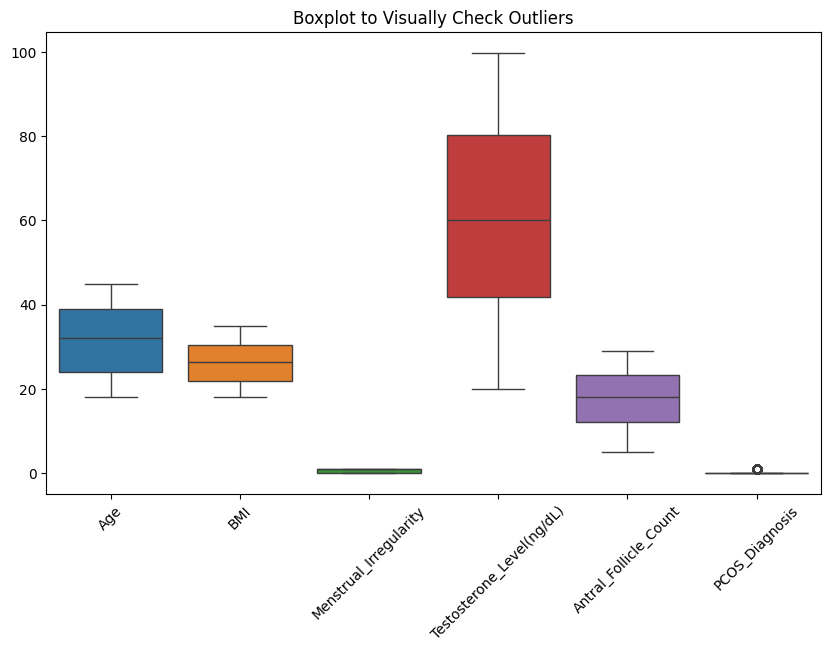

In [14]:
# Checking for outliers using Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Boxplot to Visually Check Outliers")
plt.show()

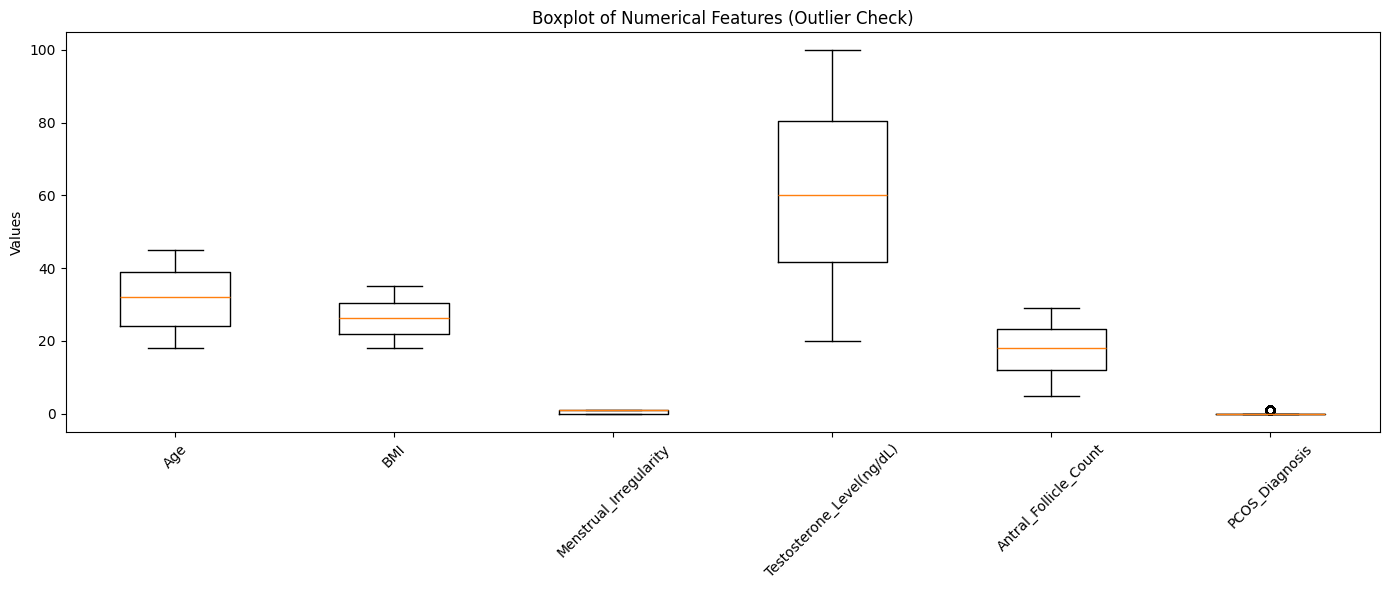

In [15]:
# Outlier Detection using Boxplots (Matplotlib Only)

import matplotlib.pyplot as plt

# Select all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a figure for the boxplots
plt.figure(figsize=(14, 6))
plt.boxplot([df[col].dropna() for col in numeric_cols], vert=True)
plt.xticks(ticks=range(1, len(numeric_cols)+1), labels=numeric_cols, rotation=45)
plt.title("Boxplot of Numerical Features (Outlier Check)")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

In [16]:
# Class balance in the target
df['PCOS_Diagnosis'].value_counts()

PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64

In [17]:
# Target info
print("Target column:", 'PCOS_Diagnosis')
print("Data type:", df['PCOS_Diagnosis'].dtype)
print("Unique values:", df['PCOS_Diagnosis'].unique())

Target column: PCOS_Diagnosis
Data type: int64
Unique values: [0 1]


## Data Visualization
For classification: compare histogram every feature between the classes. Lots of examples of this in class.

For regression:

Define 2 or more class based on value of the regression target.
- For example: if regression target is between 0 and 1:
  * 0.0-0.25: Class 1
  * 0.25-0.5: Class 2
  * 0.5-0.75: Class 3
  * 0.75-1.0: Class 4
  
- Compare histograms of the features between the classes.
- Note that for categorical features, often times the information in the histogram could be better presented in a table.

- Make comments on what features look most promising for ML task.

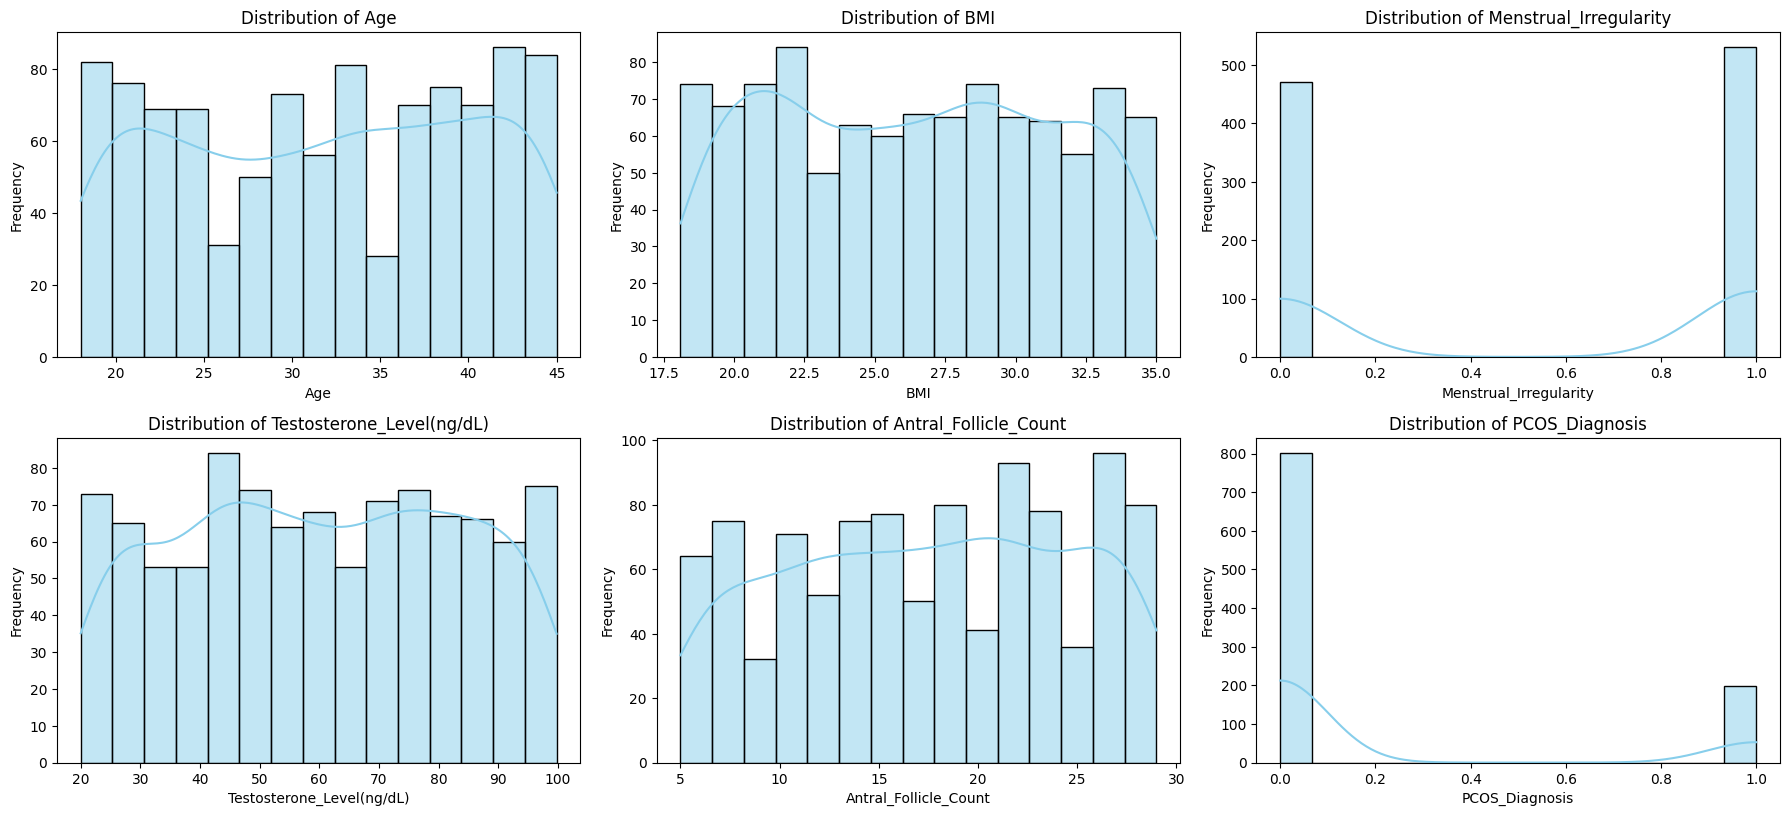

In [18]:
# Visualizing the features

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean up column names just in case
df.columns = df.columns.str.strip()

# Step 2: Select numerical features only (excluding the target)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Safely remove the target column if it's in the list
target_col = 'PCOS (Y/N)'
if target_col in numerical_features:
    numerical_features.remove(target_col)

# Step 3: Setup subplot layout
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))  # change shape based on how many features
axes = axes.flatten()

# Step 4: Loop and plot histograms
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=15, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Feature Distribution by Class (PCOS vs Non-PCOS)

splitting the data into two subsets:
- patients with PCOS (PCOS = 1)
- patients without PCOS (PCOS = 0)

Then, using a loop, plotting histograms for each numerical feature. 

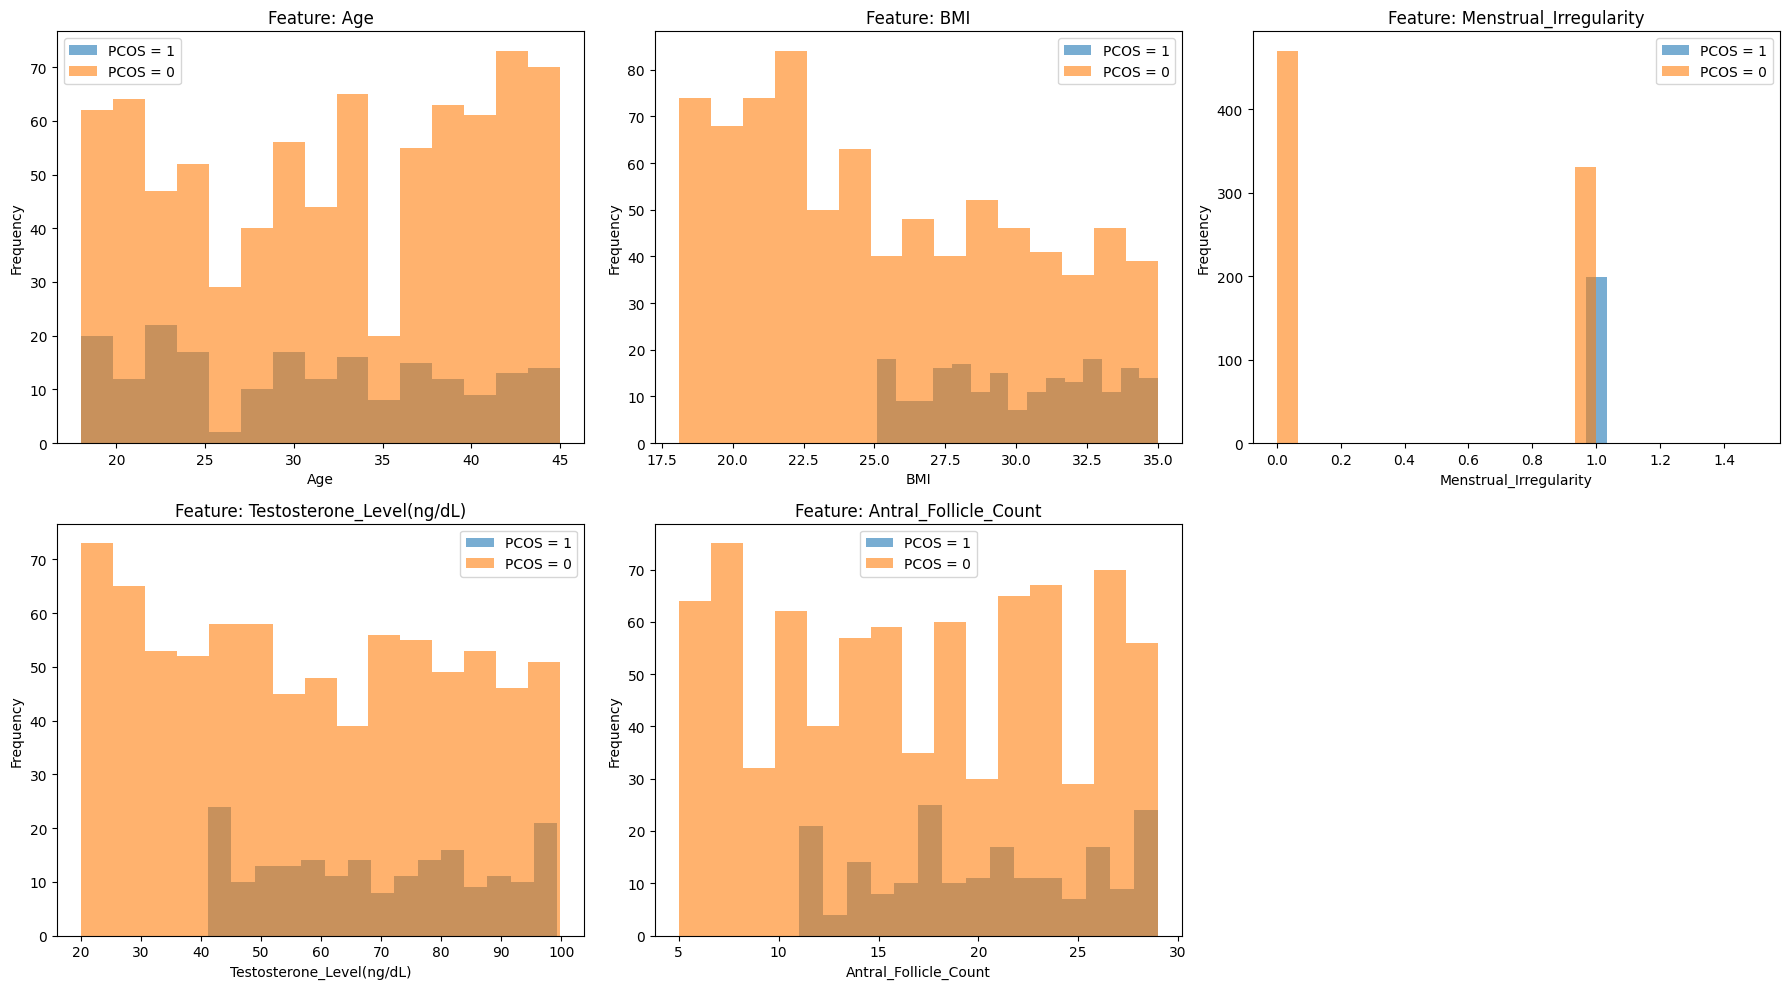

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names just to be safe
df.columns = df.columns.str.strip()

# Set target column name correctly
target_col = 'PCOS_Diagnosis'

# Select numeric features and drop the target column
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if target_col in numerical_features:
    numerical_features.remove(target_col)

# Split the data into two groups: PCOS = 1 and PCOS = 0
df_pcos = df[df[target_col] == 1]
df_non_pcos = df[df[target_col] == 0]

# Setup subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # adjust rows/cols for 5 features
axes = axes.flatten()

# Loop through and plot histograms
for i, feature in enumerate(numerical_features):
    axes[i].hist(df_pcos[feature], bins=15, alpha=0.6, label='PCOS = 1')
    axes[i].hist(df_non_pcos[feature], bins=15, alpha=0.6, label='PCOS = 0')
    axes[i].set_title(f"Feature: {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

# Remove extra unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Bar Plots for Binary Features — Class Separation

As part of feature visualization, we created bar plots for binary features in the dataset, such as Menstrual_Irregularity.

Each bar plot compares the frequency of 0s and 1s for PCOS = 0 and PCOS = 1.  
This helps visually show how well each binary feature separates the two classes.

Features like Menstrual_Irregularity are expected to behave as “perfect predictors”, where almost all patients with irregular cycles are diagnosed with PCOS. This follows the guidance from our professor and matches what we learned in class about strong binary classification signals.


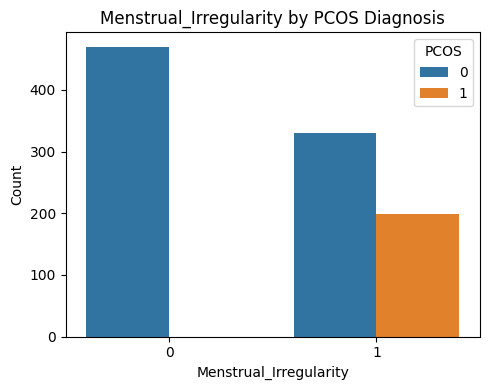

In [20]:
# Feature Visualization — Bar Plots for Binary Features (PCOS vs Non-PCOS)

import seaborn as sns
import matplotlib.pyplot as plt

# List of binary features to compare
binary_features = ['Menstrual_Irregularity']  # Add more if needed

# Loop through each binary feature and plot bar plot split by PCOS diagnosis
for feature in binary_features:
    plt.figure(figsize=(5, 4))
    
    # Count plot with hue based on PCOS_Diagnosis (target)
    sns.countplot(data=df, x=feature, hue='PCOS_Diagnosis')
    
    plt.title(f"{feature} by PCOS Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="PCOS")
    plt.tight_layout()
    plt.show()

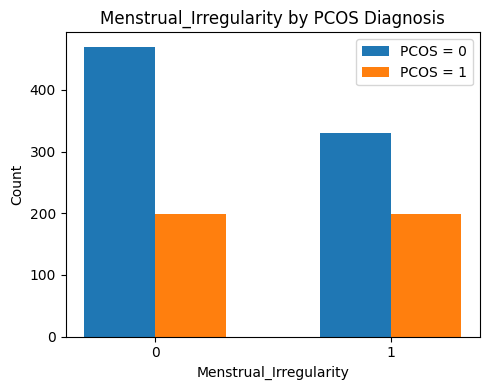

In [21]:
# Feature Visualization — Bar Plots for Binary Features (Using Matplotlib Only)

import matplotlib.pyplot as plt

# List of binary features to compare
binary_features = ['Menstrual_Irregularity']  # Add more if needed

# Loop through each binary feature
for feature in binary_features:
    # Count values for PCOS = 1 and PCOS = 0
    counts_1 = df[df['PCOS_Diagnosis'] == 1][feature].value_counts().sort_index()
    counts_0 = df[df['PCOS_Diagnosis'] == 0][feature].value_counts().sort_index()

    # X locations (0 and 1)
    x = [0, 1]
    
    # Creating the plot
    plt.figure(figsize=(5, 4))
    plt.bar([i - 0.15 for i in x], counts_0, width=0.3, label="PCOS = 0", align='center')
    plt.bar([i + 0.15 for i in x], counts_1, width=0.3, label="PCOS = 1", align='center')

    plt.title(f"{feature} by PCOS Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(x, ['0', '1'])
    plt.legend()
    plt.tight_layout()
    plt.show()

#Bar Plots for Binary Features with Trendlines

We created bar plots for binary features to visually compare how well they separate PCOS and non-PCOS patients.

Each bar shows the number of patients for each binary value (0 or 1), split by PCOS diagnosis.  
The red dashed trendline indicates the overall average trend between the two classes.

Features like Menstrual_Irregularity show a strong separation between PCOS-positive and PCOS-negative groups, suggesting it could act as a near-perfect predictor for PCOS diagnosis.

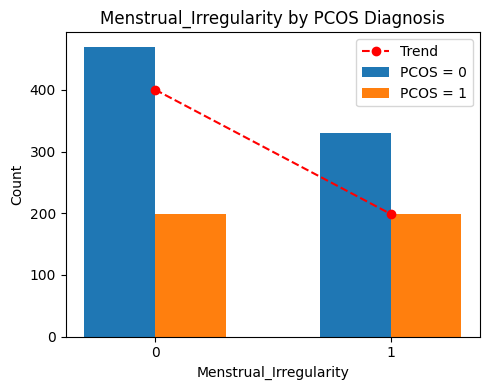

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# List of binary features we want to visualize
binary_features = ['Menstrual_Irregularity']  # Add more if you want

# Loop through each binary feature
for feature in binary_features:
    
    # Count values separately for PCOS = 1 and PCOS = 0
    counts_1 = df[df['PCOS_Diagnosis'] == 1][feature].value_counts().sort_index()
    counts_0 = df[df['PCOS_Diagnosis'] == 0][feature].value_counts().sort_index()
    
    # X locations (0 and 1)
    x = [0, 1]

    # Plotting bar plots
    plt.figure(figsize=(5,4))
    plt.bar([i - 0.15 for i in x], counts_0, width=0.3, label='PCOS = 0', align='center')
    plt.bar([i + 0.15 for i in x], counts_1, width=0.3, label='PCOS = 1', align='center')

    # Adding a trend line (mean of bars)
    plt.plot(x, [np.mean(counts_0), np.mean(counts_1)], color='red', marker='o', linestyle='--', label='Trend')

    # Titles and labels
    plt.title(f"{feature} by PCOS Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(x, ['0', '1'])
    plt.legend()
    plt.tight_layout()
    plt.show()

#Binary Features Summary and Analysis

In [23]:
#Find Binary Features
binary_features = []
for col in df.columns:
    if df[col].nunique() == 2 and col != 'PCOS_Diagnosis':  # Exclude target
        binary_features.append(col)

#Create Summary Table
binary_summary = []

for feature in binary_features:
    count_0 = (df[feature] == 0).sum()
    count_1 = (df[feature] == 1).sum()
    
    # Optional: Check how it correlates with PCOS
    corr_with_target = df[[feature, 'PCOS_Diagnosis']].corr().iloc[0, 1]
    
    binary_summary.append({
        'Feature': feature,
        'Count 0': count_0,
        'Count 1': count_1,
        'Correlation with PCOS': round(corr_with_target, 3)
    })

#Display Summary Table
import pandas as pd
binary_summary_df = pd.DataFrame(binary_summary)
binary_summary_df

,Feature,Count 0,Count 1,Correlation with PCOS
0,Menstrual_Irregularity,470,530,0.469


#Correlation heatmaps

In [24]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [25]:
!pip install numpy


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


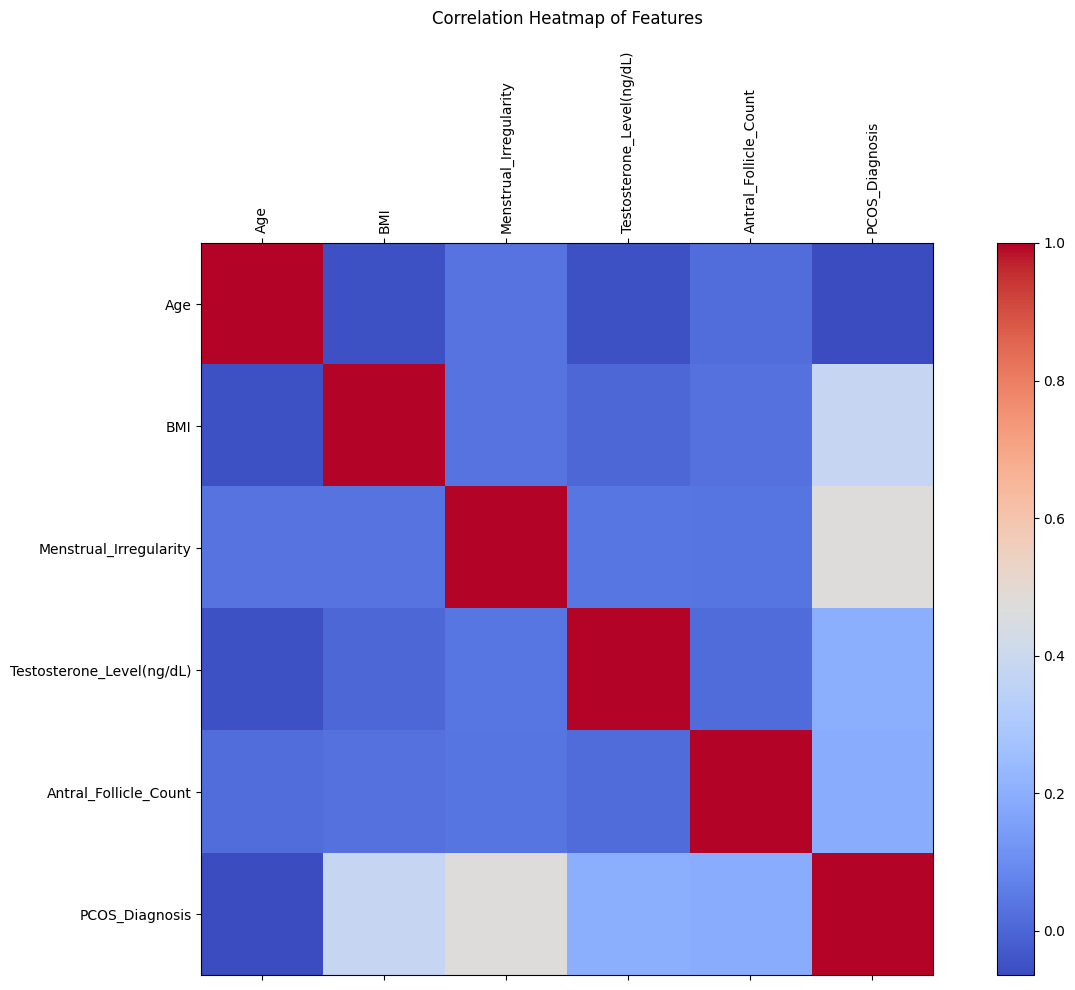

In [26]:
#Feature Visualization — Correlation Heatmap using Matplotlib Only

import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculating the correlation matrix
corr_matrix = df.corr()

# Step 2: Seting up the figure
fig, ax = plt.subplots(figsize=(14, 10))

# Step 3: Creating a heatmap using imshow
cax = ax.matshow(corr_matrix, cmap="coolwarm")

# Step 4: Adding colorbar
fig.colorbar(cax)

# Step 5: Seting axis ticks
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Step 6: Adding title
plt.title("Correlation Heatmap of Features", pad=20)
plt.tight_layout()

plt.show()

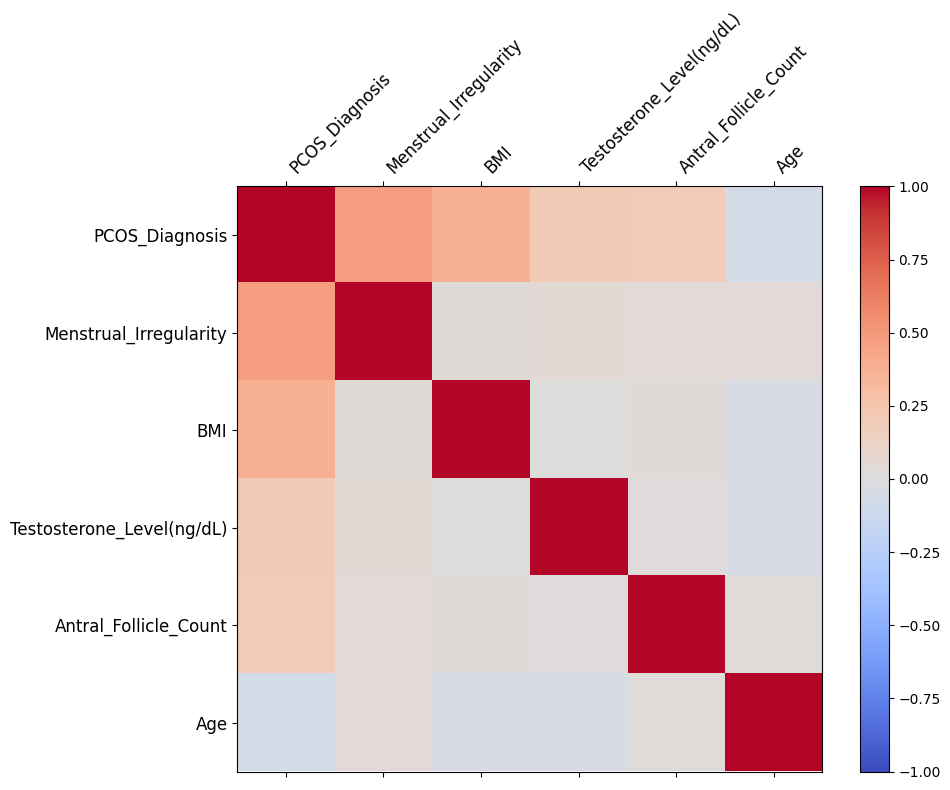

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df
corr = df[['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', 'PCOS_Diagnosis']].corr()

# Sorting features based on correlation with PCOS_Diagnosis
corr_target = corr['PCOS_Diagnosis'].abs().sort_values(ascending=False)
sorted_features = corr_target.index.tolist()
corr = corr.loc[sorted_features, sorted_features]

# Masking upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Applying mask manually
for i in range(len(corr)):
    for j in range(len(corr)):
        if mask[i, j]:
            corr.iloc[i, j] = np.nan

# Ploting again with mask
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Seting ticks
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, fontsize=12, rotation=45, ha='left')
ax.set_yticklabels(corr.index, fontsize=12)

# Colorbar
fig.colorbar(cax)

# Layout adjustments
plt.tight_layout()
plt.show()

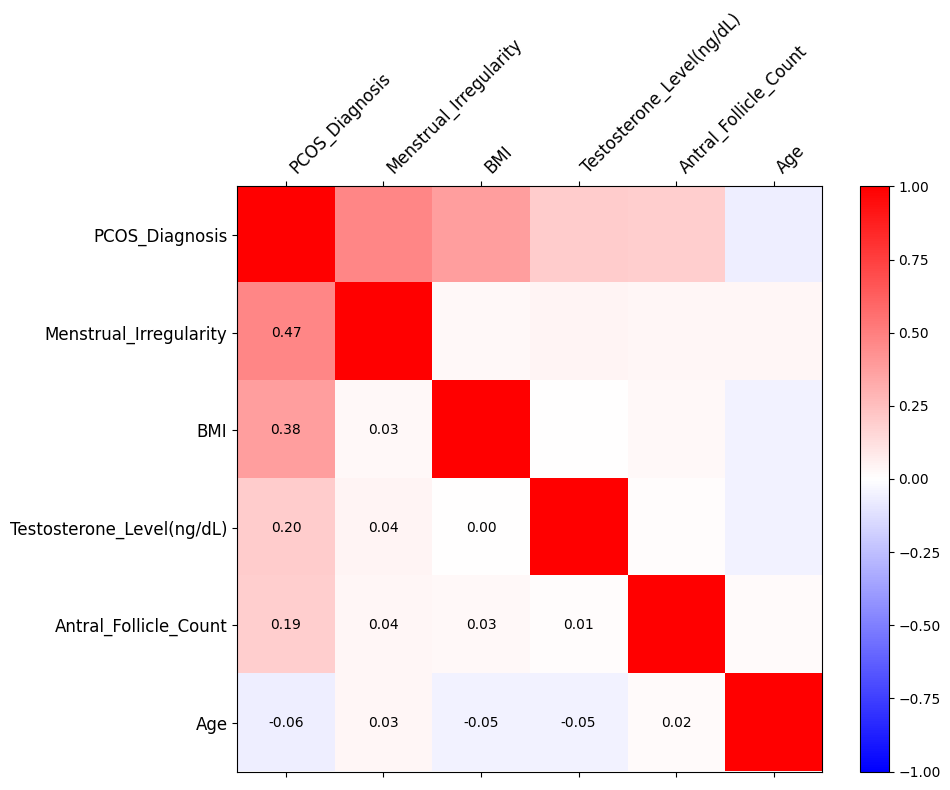

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

corr = df[['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', 'PCOS_Diagnosis']].corr()

# Sort features by correlation with PCOS_Diagnosis
corr_target = corr['PCOS_Diagnosis'].abs().sort_values(ascending=False)
sorted_features = corr_target.index.tolist()
corr = corr.loc[sorted_features, sorted_features]

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='bwr', vmin=-1, vmax=1)

# Set ticks
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, fontsize=12, rotation=45, ha='left')
ax.set_yticklabels(corr.index, fontsize=12)

# Annotate values
for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:  # Only annotate lower triangle
            value = corr.iloc[i, j]
            ax.text(j, i, f"{value:.2f}", ha="center", va="center", color="black", fontsize=10)

# Colorbar
fig.colorbar(cax)

# Layout
plt.tight_layout()
plt.show()

#Feature Correlation with PCOS Diagnosis

We calculated the correlation of each feature with the target variable PCOS_Diagnosis.

Features like Menstrual_Irregularity showed a strong positive correlation, making them strong predictors for PCOS classification.


In [29]:
#Checking Feature Correlations with PCOS Diagnosis

# Calculating correlation matrix
correlations = df.corr()

# Extracting correlation values with the target 'PCOS_Diagnosis'
pcos_corr = correlations['PCOS_Diagnosis'].drop('PCOS_Diagnosis')  # Remove self-correlation

# Sorting by strength
pcos_corr_sorted = pcos_corr.sort_values(ascending=False)

# Display
pcos_corr_sorted

Menstrual_Irregularity       0.469376
BMI                          0.377852
Testosterone_Level(ng/dL)    0.200817
Antral_Follicle_Count        0.192014
Age                         -0.064675
Name: PCOS_Diagnosis, dtype: float64

## Data Cleaning and Preperation for Machine Learning
- Perform any data cleaning. Be clear what are you doing, for what feature.
- Determinine if rescaling is important for your Machine Learning model.
  * If so select strategy for each feature.
  * Apply rescaling.
- Visualize the features before and after cleaning and rescaling.
- One-hot encode your categorical features.

#Data Cleaning 
- data set has no useless ID columns or "Unnamed" columns
- one-hot encoding
- need to scale numerical features

In [30]:
#One-Hot Encoding Check

# Checking all features with 2 or fewer unique values (likely binary or categorical)
for col in df.columns:
    if df[col].nunique() <= 2:
        print(f"{col}: {df[col].unique()}")


Menstrual_Irregularity: [1 0]
PCOS_Diagnosis: [0 1]


#One-Hot Encoding
- We checked whether one-hot encoding was necessary for our dataset.  
- Since all features are already numerical (either continuous or binary 0/1), no one-hot encoding was required for this project.

#Scaling Numerical Features

- We standardized all numerical features (except the target `PCOS_Diagnosis`) using StandardScaler.
- This ensures that all features are on the same scale, with mean = 0 and standard deviation = 1, 
which improves the performance of many machine learning models.

In [31]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [32]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns (excluding the target 'PCOS_Diagnosis')
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('PCOS_Diagnosis')  # Remove target from scaling

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting and transforming the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [33]:
# Checking after scaling
df[numerical_features].describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-9.681145e-17,-9.592327e-17,2.042810e-17,-5.861978e-17,-1.740830e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.627926e+00,-1.679887e+00,-1.061913e+00,-1.734855e+00,-1.764706e+00
25%,-9.186416e-01,-9.095754e-01,-1.061913e+00,-7.974341e-01,-7.740138e-01
50%,2.707102e-02,2.635275e-03,9.416966e-01,-6.890259e-03,7.515110e-02
75%,8.545696e-01,8.337605e-01,9.416966e-01,8.700518e-01,8.181704e-01
max,1.563854e+00,1.745971e+00,9.416966e-01,1.712435e+00,1.631953e+00


# Machine Learning
## Problem Formulation
- Remove unneed columns, for example:
  * duplicated
  * categorical features that were turned into one-hot.
  * features that identify specific rows, like ID number.
  * make sure your target is properly encoded also.
- Split training sample into train, validation, and test sub-samples.

## Train ML Algorithm
- You only need one algorithm to work. You can do more if you like.
- For now, focus on making it work, rather than best result.
- Try to get a non-trivial result.

## Evaluate Performance on Validation Sample
- Compute the usual metric for your ML task.
- Compute the score for the kaggle challenge.

## Apply ML to the challenge test set
- Once trained, apply the ML algorithm the the test dataset and generate the submission file.

#Splitting the Data into Training and Testing Sets

- To evaluate our machine learning models fairly, we split the dataset into a training set and a testing set.
- We use 80% of the data for training the model and 20% for testing.  
- Since this is a classification problem (predicting PCOS diagnosis),
  we use stratified sampling to maintain the proportion of PCOS-positive and PCOS-negative cases in both sets.

In [34]:
#Train/Test Split

from sklearn.model_selection import train_test_split

# Defining X (features) and y (target)
X = df.drop(columns=['PCOS_Diagnosis'])  # Features (everything except target)
y = df['PCOS_Diagnosis']                 # Target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 800 samples
Testing set size: 200 samples


#Logistic Regression Model
- We first trained a Logistic Regression model to predict PCOS diagnosis. 
- Since predicting PCOS is a binary problem (0 = no PCOS, 1 = PCOS),
  Logistic Regression provides a strong and interpretable baseline to evaluate the effectiveness of more complex models later.


In [35]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creating and training the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluating model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9150
Confusion Matrix:
 [[149  11]
 [  6  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       160
           1       0.76      0.85      0.80        40

    accuracy                           0.92       200
   macro avg       0.86      0.89      0.87       200
weighted avg       0.92      0.92      0.92       200



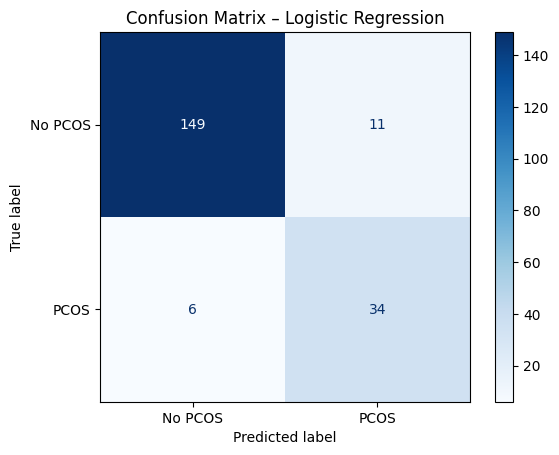

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizing Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(
    lr_model,               # use the correct model variable name
    X_test,
    y_test,
    display_labels=["No PCOS", "PCOS"],
    cmap='Blues',
    values_format='d'
)

plt.title("Confusion Matrix – Logistic Regression")
plt.grid(False)
plt.show()

#Logistic Regression Model Interpretation

After training a Logistic Regression model to predict PCOS diagnosis:

Accuracy:The model achieved an accuracy of ~91.5% on the test set, indicating strong overall performance on unseen data.

Confusion Matrix Interpretation:
  - True Negatives (TN): Correctly predicted non-PCOS cases.
  - True Positives (TP): Correctly predicted PCOS cases.
  - False Positives (FP): Predicted PCOS when it was not present (Type I Error).
  - False Negatives (FN): Missed predicting PCOS when it was actually present (Type II Error).
  
  The confusion matrix helps us visualize where the model is making correct predictions and where it is making mistakes.

#Classification Report Overview:
  - Precision: How many predicted positive cases were actually correct.
  - Recall (Sensitivity): How many actual positive cases were correctly predicted.
  - F1-Score: The harmonic mean of Precision and Recall.
  - The model shows high precision and recall for the majority class, and reasonable performance for the minority class.

Overall, the model is effective at identifying PCOS cases, with balanced performance across precision, recall, and F1-score.


#Random Forest Classifier
- To build a stronger model and compare results, we also trained a Random Forest Classifier.
- Since our Logistic Regression model is linear, using Random Forest allows us to test a non-linear, 
more flexible model to see if it improves prediction accuracy for PCOS diagnosis.

In [37]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0000
Confusion Matrix:
 [[160   0]
 [  0  40]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



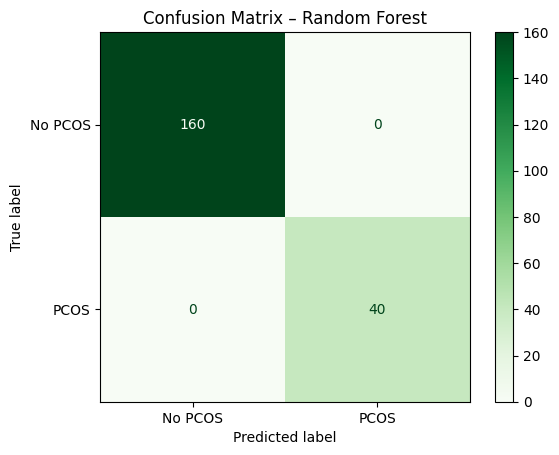

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizing Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=["No PCOS", "PCOS"],
    cmap='Greens',
    values_format='d'
)

plt.title("Confusion Matrix – Random Forest")
plt.grid(False)
plt.show()

#Random Forest Model Performance Interpretation

- The Random Forest model achieved 100% accuracy on the test set.
  
Confusion Matrix** shows:
  - All 160 patients without PCOS (class 0) were correctly classified.
  - All 40 patients with PCOS (class 1) were also perfectly classified.
    
Precision, Recall, and F1-scores** for both classes are 1.00, indicating:
  - Precision = 1.00: No false positives (perfect prediction when the model predicts positive).
  - Recall = 1.00: No false negatives (perfectly identifies all actual positives).
  - F1-Score = 1.00: Balanced performance between precision and recall.

#Interpretation:
- The model fits perfectly on the given test set, which could suggest:
  - Strong predictive features (e.g., Menstrual Irregularity, BMI, Hormone levels).
  - OR the dataset may be slightly small or easy to separate.
- While the results are excellent, cross-validation or external validation would be needed to ensure the model isn't overfitting.

#Cross-Validation for Logistic Regression
- We will apply 5-Fold Cross Validation to the Logistic Regression model to check how well it 
  generalizes across different parts of the training data.  
- This will help verify if the model is overfitting or performing consistently.

In [39]:
from sklearn.linear_model import LogisticRegression

# Defining the logistic regression model
logreg_model = LogisticRegression()

In [40]:
# Logistic Regression – K-Fold Cross Validation

from sklearn.model_selection import cross_val_score

# Performing 5-Fold Cross Validation
logreg_cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')

# Displaying the results
print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Mean Cross-Validation Accuracy (Logistic Regression): {:.4f}".format(logreg_cv_scores.mean()))

Logistic Regression Cross-Validation Scores: [0.925   0.91875 0.8875  0.875   0.9375 ]
Mean Cross-Validation Accuracy (Logistic Regression): 0.9088


#Cross-Validation for Random Forest
- We will apply 5-Fold Cross Validation to the Random Forest model.  
- This will ensure that the model's high accuracy is consistent and not just due to overfitting on a particular training split.

In [41]:
# Random Forest – K-Fold Cross Validation

# Performing 5-Fold Cross Validation
rf_cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')

# Displaying the results
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean Cross-Validation Accuracy (Random Forest): {:.4f}".format(rf_cv_scores.mean()))

NameError: name 'model_rf' is not defined

In [42]:
# Random Forest – K–Fold Cross Validation

# Performing 5–Fold Cross Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Displaying the results
print("Random Forest Cross–Validation Scores:", rf_cv_scores)
print("Mean Cross–Validation Accuracy (Random Forest): {:.4f}".format(rf_cv_scores.mean()))

Random Forest Cross–Validation Scores: [0.99375 0.9875  1.      1.      1.     ]
Mean Cross–Validation Accuracy (Random Forest): 0.9963


#Model comparison

#Cross-Validation Results: Logistic Regression vs. Random Forest

To evaluate the reliability and generalization of our models, we applied 5-Fold Cross Validation to both Logistic Regression and Random Forest classifiers.

Logistic Regression:
- Cross-validation scores: [0.925, 0.91875, 0.8875, 0.875, 0.9375]
- Mean Accuracy: 0.9088
- The scores are consistent across all folds, showing low variance.
- This suggests logistic regression performs reliably and is not overfitting, making it a strong baseline model.

Random Forest:
- Cross-validation scores: [0.99375, 0.9875, 1.0, 1.0, 1.0]
- Mean Accuracy: 0.9963
- These scores indicate extremely high performance, with several folds achieving perfect accuracy.
- While promising, such high scores may suggest potential overfitting, especially given the small size of the dataset.
- Additional regularization or external testing might be needed to validate its robustness on unseen data.

Conclusion: Logistic regression generalizes well and is more interpretable. Random forest gives higher accuracy but may overfit. Comparing both gives a better overall understanding of model performance.


Small Random Forest Accuracy: 0.9950
Classification Report (Small RF):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       160
           1       0.98      1.00      0.99        40

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



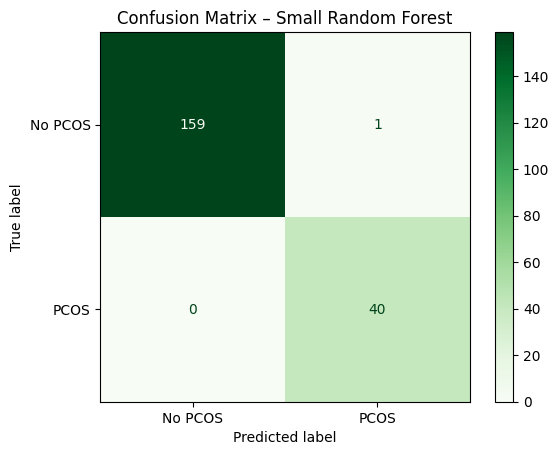

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Training a very small Random Forest
small_rf = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)
small_rf.fit(X_train, y_train)

# Predictions
y_pred_small_rf = small_rf.predict(X_test)

# Accuracy
accuracy_small_rf = accuracy_score(y_test, y_pred_small_rf)
print(f"Small Random Forest Accuracy: {accuracy_small_rf:.4f}")

# Classification Report
print("Classification Report (Small RF):")
print(classification_report(y_test, y_pred_small_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    small_rf, X_test, y_test,
    display_labels=["No PCOS", "PCOS"],
    cmap='Greens',
    values_format='d'
)
plt.title("Confusion Matrix – Small Random Forest")
plt.grid(False)
plt.show()

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing one decision tree from the small random forest
plt.figure(figsize=(20, 10))
plot_tree(
    small_rf_model.estimators_[0],            
    feature_names=X.columns,                  
    class_names=["No PCOS", "PCOS"],         
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree from Small Random Forest")
plt.show()

NameError: name 'small_rf_model' is not defined

<Figure size 2000x1000 with 0 Axes>

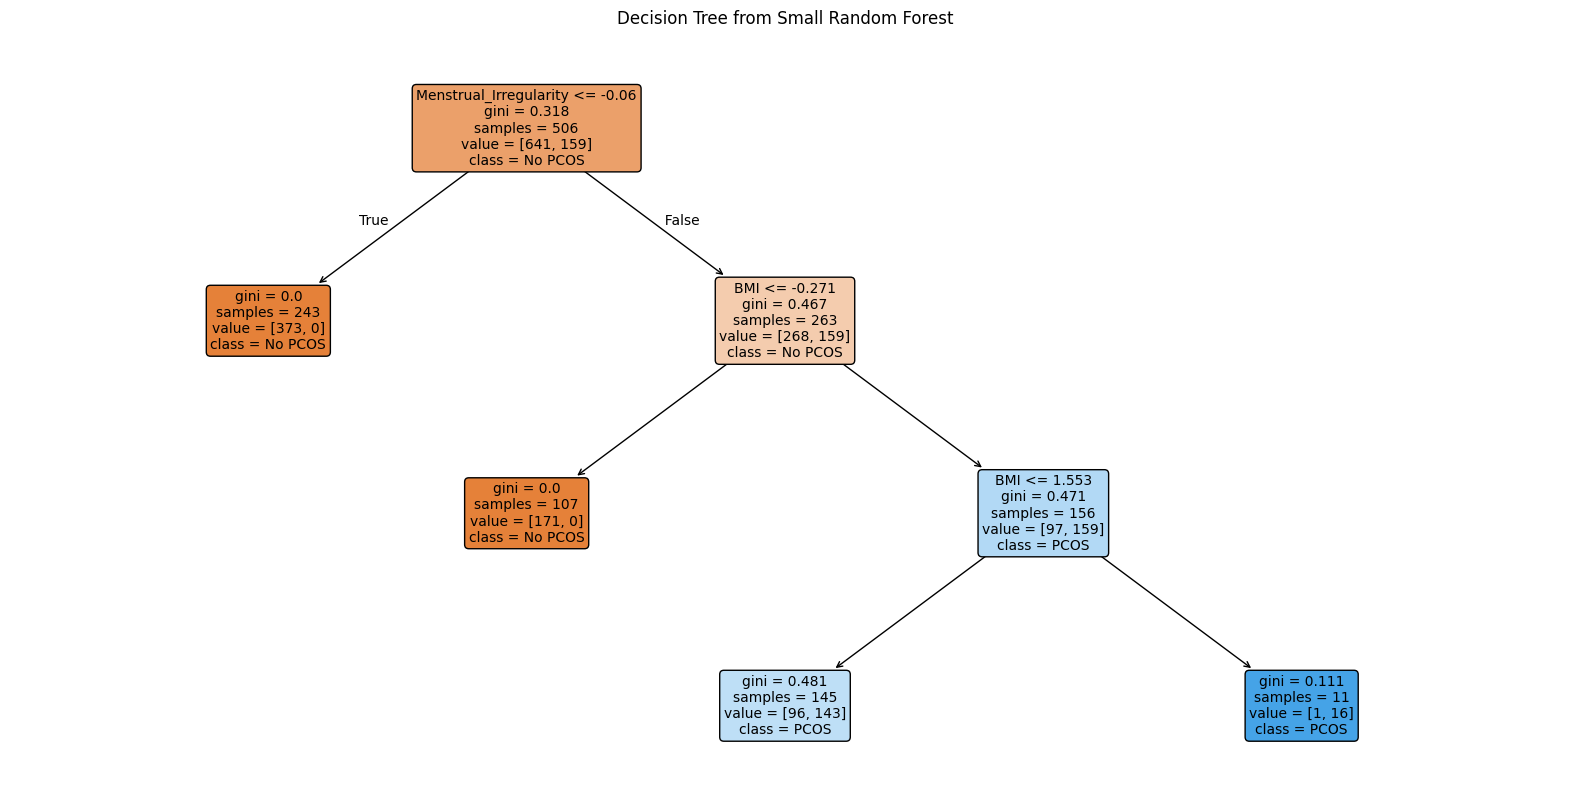

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing one decision tree from the small random forest
plt.figure(figsize=(20, 10))
plot_tree(
    small_rf.estimators_[0],                
    feature_names=X.columns,                
    class_names=["No PCOS", "PCOS"],        
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree from Small Random Forest")
plt.show()